# Steps
### 1. Scrape the Data
### 2. Data Cleaning
### 3. Convert your data into DataFrame
### 4. Perform the Data Analysis - Data Cleaning, Data Exploration, Data Manipulation, Data Viosualization
### 5. Perform the EDA (Exploratory Data Analysis)

# Performing the Data Scraping from the WEB
## Link: https://sofifa.com/players

## Q1. Give the logic to print the URL for all the 10 pages

In [127]:
for i in range(0,541,60):
  print(f'https://sofifa.com/players?offset={i}')

# Here we extract the link of the first 10 pages from sofifa.com/players to perform EDA.

https://sofifa.com/players?offset=0
https://sofifa.com/players?offset=60
https://sofifa.com/players?offset=120
https://sofifa.com/players?offset=180
https://sofifa.com/players?offset=240
https://sofifa.com/players?offset=300
https://sofifa.com/players?offset=360
https://sofifa.com/players?offset=420
https://sofifa.com/players?offset=480
https://sofifa.com/players?offset=540


# Begining 

In [128]:
# Import all the libraries 
import pandas as pd
import re #RegEx
from bs4 import BeautifulSoup # Will be used for web scrapping
import requests # requests will allow you to send HTTP/1.1 requests using Python.

In [129]:
url = 'https://sofifa.com/players?offset=0'
# Here we take the URl of the first page of sofifa to check if we can scrape the data or not

In [130]:
req = requests.get(url)
# here get() method sends a GET request to the specified url.

In [131]:
req.status_code
# Status code 200 means the site is up and running

200

In [132]:
soup = BeautifulSoup(req.content) # The variable soup now holds the contents of the page in the form of a string

In [133]:
soup.prettify() # Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document

'<!DOCTYPE html>\n<html lang="en-US">\n <head id="head">\n  <title>\n   Players FIFA 23 Nov 16, 2022 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 23 player ratings on Nov 16, 2022" name="description"/>\n  <meta content="Khachin Borjigin" name="author"/>\n  <meta content="2009 - 2022 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="/launcher-icon.png" rel="shortcut icon"/>\n  <link href="/launcher-icon.png" rel="apple-touch-icon"/>\n  <script>\n   window.ramp = window.ramp || {};window.ramp.que = window.ramp.que || [];\n  </script>\n  <link href="https://sofifa.com/players?hl=en-US" hreflang="en" rel="alternate"/>\n  <link href="https://sofifa.com/players?hl=fr-FR" hreflang="fr" r

In [134]:
arr = [i for i in soup.findAll('tr')] # Puts all individual <tr></tr> tags in an array 

In [135]:
arr[0]

<tr class="persist-header">
<th class="col-avatar"></th>
<th class="col-name text-left">Name</th><th aria-label="Age" class="col col-ae" data-tip-pos="top" role="tooltip"><a class="pjax ellipsis" href="/players?col=ae&amp;sort=asc" rel="nofollow"><span class="bp3-icon sorter"></span>Age</a></th><th aria-label="Overall Rating" class="col col-oa" data-tip-pos="top" role="tooltip"><a class="pjax ellipsis" href="/players?col=oa&amp;sort=desc" rel="nofollow"><span class="bp3-icon sorter"></span>OVA</a></th><th aria-label="Potential" class="col col-pt" data-tip-pos="top" role="tooltip"><a class="pjax ellipsis" href="/players?col=pt&amp;sort=desc" rel="nofollow"><span class="bp3-icon sorter"></span>POT</a></th><th aria-label="Team &amp; Contract" class="col-name text-left" data-tip-pos="top" role="tooltip"><a class="pjax ellipsis" href="/players?col=tm&amp;sort=asc" rel="nofollow"><span class="bp3-icon sorter"></span>Team &amp; Contract</a></th>
<th aria-label="Value" class="col col-vl" data-

In [136]:
del arr[0]

In [137]:
arr[0]

<tr>
<td class="col-avatar" data-balloon="Click here!" data-balloon-pos="up" data-balloon-visible=""><figure class="avatar">
<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/241/721/23_60.png" data-srcset="https://cdn.sofifa.net/players/241/721/23_120.png 2x, https://cdn.sofifa.net/players/241/721/23_180.png 3x" data-type="player" id="241721" src="https://cdn.sofifa.net/players/notfound_0_60.png"/></figure></td>
<td class="col-name">
<a aria-label="Rafael da Conceição Leão" data-tip-pos="top" href="/player/241721/rafael-da-conceicao-leao/230006/" role="tooltip"><div class="ellipsis">Rafael Leão</div></a><img alt="" class="flag" data-src="https://cdn.sofifa.net/flags/pt.png" data-srcset="https://cdn.sofifa.net/flags/pt@2x.png 2x, https://cdn.sofifa.net/flags/pt@3x.png 3x" height="16" src="https://cdn.sofifa.net/pixel.gif" title="Portugal" width="21"/> <a href="/players?pn=27" rel="nofollow"><span class="pos pos27">LW</

In [138]:
# using RegEx to extract the image link for each player
re.sub('^<img.*data-srcset="| .*/>', '' , str(arr[0].find('img',{"class": "player-check"})))

'https://cdn.sofifa.net/players/241/721/23_120.png'

### A good way to navigate through the data and see what information lies where, we can go to website and use devtools to see in which particular tag what data lies

In [139]:
arr[0].find('div', {"class":"ellipsis"})

<div class="ellipsis">Rafael Leão</div>

In [140]:
# Extracting Name using RegEx
re.sub('^<.*">|<.*>', '', str(arr[0].find('div', {"class":"ellipsis"})))

'Rafael Leão'

In [141]:
str(arr[0].find('td', {"class":"col-ae"}))

'<td class="col col-ae" data-col="ae">23</td>'

In [142]:
# Age
re.sub('^<td.*">|</td>', '', str(arr[0].find('td', {"class":"col"})))

'23'

In [143]:
# OVA
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col col-oa"})))

'84'

In [144]:
# POT
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class":"col col-pt"})))

'90'

In [145]:
# Team
re.sub('<a.*">|<.*>', '', str(arr[0].findAll('a')[-1]))

'Milan'

In [146]:
# Duration
re.sub('<div.*\n|<.*>', '', str(arr[0].find('div', {"class": "sub"})))

'2019 ~ 2024'

In [147]:
# Value
re.sub('^<td.*">€|<.*>', '', str(arr[0].find('td', {"class": "col col-vl"})))

'66.5M'

In [148]:
# Wage
re.sub('^<td.*">€|<.*>', '', str(arr[0].find('td', {"class": "col col-wg"})))

'90K'

In [149]:
# Total Stats
re.sub('^<td.*">|<.*>', '', str(arr[0].find('td', {"class": "col col-tt"})))

'1971'

## Appending values to a dataframe

In [150]:
fifa_final = pd.DataFrame()

for i in range(0,541,60):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)
  if req.status_code == 200:
    soup = BeautifulSoup(req.content)
    lists = [[] for _ in range(10)]

    for i in soup.findAll('tr'):
      Image_Link = re.sub('^<img.*data-srcset="| .*/>', '' , str(i.find('img',{"class": "player-check"})))
      Name = re.sub('^<a.*">|<.*>', '', str(i.find('a', {"role":"tooltip"})))
      Age = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col"})))
      OVA = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col col-oa"})))
      POT = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col col-pt"})))
      Team = re.sub('<a.*">|<.*>', '', str(i.findAll('a')[-1]))
      Duration = re.sub('<div.*\n|<.*>', '', str(i.find('div', {"class": "sub"})))
      Value = re.sub('^<td.*">€|<.*>', '', str(i.find('td', {"class": "col col-vl"})))
      Wage = re.sub('^<td.*">€|<.*>', '', str(i.find('td', {"class": "col col-wg"})))
      Total_stats = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class": "col col-tt"})))


      lists[0].append(Image_Link)
      lists[1].append(Name)
      lists[2].append(Age)
      lists[3].append(OVA)
      lists[4].append(POT)
      lists[5].append(Team)
      lists[6].append(Duration)
      lists[7].append(Value)
      lists[8].append(Wage)
      lists[9].append(Total_stats)


  fifa = pd.DataFrame({"Image_link":lists[0],
                      "Name": lists[1],
                      "Age": lists[2],
                      "OVA": lists[3],
                      "POT": lists[4],
                      "Team": lists[5],
                      "Duration": lists[6],
                      "Value": lists[7],
                      "Wage": lists[8],
                      "Total_stats": lists[9]})

  fifa.drop(0, inplace=True)

  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])

  fifa_final = pd.concat([fifa_final,fifa], ignore_index=True)

In [151]:
fifa_final.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/241/721/23_120.png,Rafael Leão,23,84,90,Milan,2019 ~ 2024,66.5M,90K,1971
1,https://cdn.sofifa.net/players/258/608/23_120.png,O. Bukari,23,70,74,,Free,0,0,1774
2,https://cdn.sofifa.net/players/234/577/23_120.png,Diogo Costa,22,80,86,Porto,2016 ~ 2026,27.5M,11K,1193
3,https://cdn.sofifa.net/players/245/155/23_120.png,M. Kudus,21,77,85,Ajax,2020 ~ 2025,23.5M,13K,2032
4,https://cdn.sofifa.net/players/020/801/23_120.png,Cristiano Ronaldo,37,90,90,Manchester United,2021 ~ 2023,41M,220K,2147


In [152]:
fifa_final.tail(10)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
590,https://cdn.sofifa.net/players/263/522/23_120.png,J. Sarmiento,20,66,80,Brighton &amp; Hove Albion,2021 ~ 2026,2.1M,12K,1611
591,https://cdn.sofifa.net/players/263/635/23_120.png,I. Bamba,20,66,81,Vitória SC,2020 ~ 2026,1.9M,2K,1717
592,https://cdn.sofifa.net/players/263/929/23_120.png,M. Cancellieri,19,73,86,Lazio,"Jun 30, 2023",7M,14K,1874
593,https://cdn.sofifa.net/players/264/298/23_120.png,C. Bradley,18,64,82,Bolton Wanderers,"Jun 30, 2023",1.4M,5K,1589
594,https://cdn.sofifa.net/players/264/453/23_120.png,M. van de Ven,21,71,85,VfL Wolfsburg,2021 ~ 2025,4.3M,17K,1722
595,https://cdn.sofifa.net/players/264/699/23_120.png,K. Asllani,20,73,85,Inter,"Jun 30, 2023",7M,7K,1888
596,https://cdn.sofifa.net/players/266/609/23_120.png,T. Iroegbunam,19,63,82,Queens Park Rangers,"Jun 30, 2023",1.2M,7K,1681
597,https://cdn.sofifa.net/players/268/460/23_120.png,G. Kuol,17,60,82,Central Coast Mariners,2022 ~ 2024,775K,500,1466
598,https://cdn.sofifa.net/players/269/641/23_120.png,Iker Álvarez,20,62,74,Villarreal,2021 ~ 2023,850K,2K,1035
599,https://cdn.sofifa.net/players/271/577/23_120.png,I. Sulemana Kakari,19,65,80,Hellas Verona,2022 ~ 2025,1.6M,3K,1828


In [153]:
fifa_final.columns # All the columns of the fifa dataset

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')

In [154]:
len(fifa_final) # Number of entries in the final dataset

600

In [155]:
len(fifa_final.columns) # Total Columns in the final dataset

10

In [156]:
fifa_final.info() # Some general info about our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_link   600 non-null    object
 1   Name         600 non-null    object
 2   Age          600 non-null    int64 
 3   OVA          600 non-null    int64 
 4   POT          600 non-null    int64 
 5   Team         600 non-null    object
 6   Duration     600 non-null    object
 7   Value        600 non-null    object
 8   Wage         600 non-null    object
 9   Total_stats  600 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 47.0+ KB


In [157]:
fifa_final.describe() # Some statistical information about our dataset

,Age,OVA,POT,Total_stats
count,600.000000,600.000000,600.000000,600.000000
mean,24.060000,77.746667,83.675000,1896.300000
std,4.456774,5.882190,4.013671,237.208354
min,17.000000,58.000000,67.000000,1035.000000
25%,21.000000,74.000000,82.000000,1791.750000
50%,23.000000,78.000000,84.000000,1932.500000
75%,26.000000,82.000000,86.000000,2057.000000
max,40.000000,91.000000,95.000000,2312.000000


# From here on we check for impurties in our dataset and correct them

In [158]:
# How many null values are there in each column?
fifa_final.isna().sum()

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [159]:
# How many null values are there in a dataset?
fifa_final.isna().sum().sum()

0

In [160]:
# Check for the Duplicate values?
fifa_final.duplicated().sum()

11

In [161]:
fifa_final.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [162]:
# Show all duplicated values
fifa_final[fifa_final.duplicated()]

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
120,https://cdn.sofifa.net/players/183/569/23_120.png,E. Choupo-Moting,33,75,75,FC Bayern München,2020 ~ 2023,3.6M,50K,1831
183,https://cdn.sofifa.net/players/232/639/23_120.png,R. Doan,24,77,82,SC Freiburg,2022 ~ 2024,16M,25K,1881
184,https://cdn.sofifa.net/players/234/051/23_120.png,A. Afif,25,76,78,,Free,0,0,1837
250,https://cdn.sofifa.net/players/230/869/23_120.png,Unai Simón,25,83,86,Athletic Club,2015 ~ 2025,37M,30K,1311
311,https://cdn.sofifa.net/players/240/507/23_120.png,A. Gomes,21,74,82,Lille,2020 ~ 2025,9.5M,20K,2029
394,https://cdn.sofifa.net/players/251/651/23_120.png,L. Vázquez,21,72,82,Boca Juniors,2021 ~ 2026,5.5M,10K,1725
429,https://cdn.sofifa.net/players/225/953/23_120.png,S. Bergwijn,24,81,84,Ajax,2022 ~ 2027,35M,22K,2044
457,https://cdn.sofifa.net/players/239/231/23_120.png,Cucurella,23,81,85,Chelsea,2022 ~ 2028,34.5M,90K,2132
503,https://cdn.sofifa.net/players/225/793/23_120.png,B. Godfrey,24,77,85,Everton,2020 ~ 2025,22M,31K,1833
523,https://cdn.sofifa.net/players/250/954/23_120.png,C. Richards,22,74,82,Crystal Palace,2022 ~ 2025,9M,34K,1634


In [163]:
# Delete all the duplicated values
fifa_final.drop_duplicates(inplace=True)

In [164]:
# Checking if duplicate values still exist
fifa_final[fifa_final.duplicated()]

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats


In [165]:
fifa_final.duplicated().sum()

0

In [166]:
# The final dataset shape after removing duplicates
fifa_final.shape

(589, 10)

In [167]:
# Here we notice that even thought the duplicates values are gone, the dataset hasnt been re-indexed
fifa_final.tail()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
595,https://cdn.sofifa.net/players/264/699/23_120.png,K. Asllani,20,73,85,Inter,"Jun 30, 2023",7M,7K,1888
596,https://cdn.sofifa.net/players/266/609/23_120.png,T. Iroegbunam,19,63,82,Queens Park Rangers,"Jun 30, 2023",1.2M,7K,1681
597,https://cdn.sofifa.net/players/268/460/23_120.png,G. Kuol,17,60,82,Central Coast Mariners,2022 ~ 2024,775K,500,1466
598,https://cdn.sofifa.net/players/269/641/23_120.png,Iker Álvarez,20,62,74,Villarreal,2021 ~ 2023,850K,2K,1035
599,https://cdn.sofifa.net/players/271/577/23_120.png,I. Sulemana Kakari,19,65,80,Hellas Verona,2022 ~ 2025,1.6M,3K,1828


In [168]:
# Re-indexing the dataset
fifa_final.reset_index(inplace=True)

In [169]:
fifa_final.tail()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
584,595,https://cdn.sofifa.net/players/264/699/23_120.png,K. Asllani,20,73,85,Inter,"Jun 30, 2023",7M,7K,1888
585,596,https://cdn.sofifa.net/players/266/609/23_120.png,T. Iroegbunam,19,63,82,Queens Park Rangers,"Jun 30, 2023",1.2M,7K,1681
586,597,https://cdn.sofifa.net/players/268/460/23_120.png,G. Kuol,17,60,82,Central Coast Mariners,2022 ~ 2024,775K,500,1466
587,598,https://cdn.sofifa.net/players/269/641/23_120.png,Iker Álvarez,20,62,74,Villarreal,2021 ~ 2023,850K,2K,1035
588,599,https://cdn.sofifa.net/players/271/577/23_120.png,I. Sulemana Kakari,19,65,80,Hellas Verona,2022 ~ 2025,1.6M,3K,1828


In [170]:
fifa_final.head()
# here we notice that we have an unnecesary column for index, despite already having an index which is assigned by pandas itself

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,0,https://cdn.sofifa.net/players/241/721/23_120.png,Rafael Leão,23,84,90,Milan,2019 ~ 2024,66.5M,90K,1971
1,1,https://cdn.sofifa.net/players/258/608/23_120.png,O. Bukari,23,70,74,,Free,0,0,1774
2,2,https://cdn.sofifa.net/players/234/577/23_120.png,Diogo Costa,22,80,86,Porto,2016 ~ 2026,27.5M,11K,1193
3,3,https://cdn.sofifa.net/players/245/155/23_120.png,M. Kudus,21,77,85,Ajax,2020 ~ 2025,23.5M,13K,2032
4,4,https://cdn.sofifa.net/players/020/801/23_120.png,Cristiano Ronaldo,37,90,90,Manchester United,2021 ~ 2023,41M,220K,2147


In [171]:
# Delete the column - index
fifa_final.drop(['index'], axis=1, inplace=True)

In [172]:
fifa_final.head()
# Hence, we dont have the index columns anymore 

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/241/721/23_120.png,Rafael Leão,23,84,90,Milan,2019 ~ 2024,66.5M,90K,1971
1,https://cdn.sofifa.net/players/258/608/23_120.png,O. Bukari,23,70,74,,Free,0,0,1774
2,https://cdn.sofifa.net/players/234/577/23_120.png,Diogo Costa,22,80,86,Porto,2016 ~ 2026,27.5M,11K,1193
3,https://cdn.sofifa.net/players/245/155/23_120.png,M. Kudus,21,77,85,Ajax,2020 ~ 2025,23.5M,13K,2032
4,https://cdn.sofifa.net/players/020/801/23_120.png,Cristiano Ronaldo,37,90,90,Manchester United,2021 ~ 2023,41M,220K,2147


# Performing EDA (Exploratory Data Analysis)

### 1)Find all the (name) Player who is having the highest wage.

In [173]:
fifa_highsalary_players = fifa_final.copy()

In [174]:
df = fifa_highsalary_players['Wage'].str.replace(r'\D+', '', regex=True)

In [175]:
df

0       90
1        0
2       11
3       13
4      220
      ... 
584      7
585      7
586    500
587      2
588      3
Name: Wage, Length: 589, dtype: object

In [176]:
fifa_highsalary_players['Temp Wage'] = df

In [177]:
fifa_highsalary_players.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Temp Wage
0,https://cdn.sofifa.net/players/241/721/23_120.png,Rafael Leão,23,84,90,Milan,2019 ~ 2024,66.5M,90K,1971,90
1,https://cdn.sofifa.net/players/258/608/23_120.png,O. Bukari,23,70,74,,Free,0,0,1774,0
2,https://cdn.sofifa.net/players/234/577/23_120.png,Diogo Costa,22,80,86,Porto,2016 ~ 2026,27.5M,11K,1193,11
3,https://cdn.sofifa.net/players/245/155/23_120.png,M. Kudus,21,77,85,Ajax,2020 ~ 2025,23.5M,13K,2032,13
4,https://cdn.sofifa.net/players/020/801/23_120.png,Cristiano Ronaldo,37,90,90,Manchester United,2021 ~ 2023,41M,220K,2147,220


In [178]:
fifa_highsalary_players['Temp Wage'] = fifa_highsalary_players['Temp Wage'].astype(str).astype(int)

In [179]:
fifa_highsalary_players.sort_values(by='Temp Wage', ascending = False, inplace= True)

In [180]:
fifa_highsalary_players.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats,Temp Wage
509,https://cdn.sofifa.net/players/246/791/23_120.png,M. Solomon,22,76,83,Fulham,"Jun 30, 2023",15M,900,1862,900
567,https://cdn.sofifa.net/players/252/064/23_120.png,L. Krejčí,23,76,84,Sparta Praha,2019 ~ 2025,15.5M,900,1972,900
245,https://cdn.sofifa.net/players/223/690/23_120.png,S. Rochet,29,78,80,Nacional,2019 ~ 2023,11.5M,850,1211,850
346,https://cdn.sofifa.net/players/256/325/23_120.png,J. Šutalo,22,76,84,Dinamo Zagreb,2018 ~ 2028,15.5M,850,1713,850
521,https://cdn.sofifa.net/players/259/679/23_120.png,J. Braaf,19,64,80,Borussia Dortmund II,2022 ~ 2025,1.5M,750,1741,750


In [181]:
fifa_highsalary_players.drop(['Image_link', 'OVA', 'POT','Team','Duration','Value','Total_stats','Temp Wage'], axis=1, inplace=True)

In [182]:
fifa_highsalary_players.reset_index(inplace=True)

In [183]:
fifa_highsalary_players.drop(['index'], axis=1, inplace=True)

In [184]:
fifa_highsalary_players.head(50)

,Name,Age,Wage
0,M. Solomon,22,900
1,L. Krejčí,23,900
2,S. Rochet,29,850
3,J. Šutalo,22,850
4,J. Braaf,19,750
5,M. Mudryk,21,750
6,Diego Moreira,17,600
7,G. Kuol,17,500
8,M. Baturina,19,500
9,Erik,21,500


### 2)List out the Top 10 Players according to their POT

In [185]:
fifa_top_pot = fifa_final.copy()

In [186]:
fifa_top_pot.sort_values(by='POT', ascending = False, inplace= True)

In [187]:
fifa_top_pot.reset_index(inplace=True)

In [188]:
fifa_top_pot.head()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,134,https://cdn.sofifa.net/players/231/747/23_120.png,K. Mbappé,23,91,95,Paris Saint Germain,2018 ~ 2024,190.5M,230K,2177
1,55,https://cdn.sofifa.net/players/239/085/23_120.png,E. Haaland,21,89,94,Manchester City,2022 ~ 2027,160M,230K,2123
2,59,https://cdn.sofifa.net/players/251/854/23_120.png,Pedri,19,85,92,FC Barcelona,2020 ~ 2026,104.5M,115K,2112
3,264,https://cdn.sofifa.net/players/237/692/23_120.png,P. Foden,22,85,92,Manchester City,2016 ~ 2027,109.5M,180K,2084
4,318,https://cdn.sofifa.net/players/228/702/23_120.png,F. de Jong,25,87,92,FC Barcelona,2019 ~ 2026,116.5M,230K,2238


In [189]:
fifa_top_pot.drop(['Image_link', 'OVA', 'Age','Team','Duration','Value','Total_stats','Wage','index'], axis=1, inplace=True)

In [190]:
fifa_top_pot.head(10)

,Name,POT
0,K. Mbappé,95
1,E. Haaland,94
2,Pedri,92
3,P. Foden,92
4,F. de Jong,92
5,Vinícius Jr.,92
6,K. De Bruyne,91
7,Rúben Dias,91
8,T. Courtois,91
9,J. Musiala,91


### 3)Find out all the Youngest Players

In [191]:
fifa_young_players = fifa_final.copy()

In [192]:
fifa_young_players.sort_values(by='Age', ascending = True, inplace= True)

In [193]:
fifa_young_players.reset_index(inplace=True)

In [194]:
fifa_young_players.head()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,62,https://cdn.sofifa.net/players/240/833/23_120.png,Y. Moukoko,17,71,89,Borussia Dortmund,2020 ~ 2023,4.7M,6K,1754
1,105,https://cdn.sofifa.net/players/262/863/23_120.png,A. Nusa,17,68,88,Club Brugge,2021 ~ 2025,3.3M,2K,1684
2,19,https://cdn.sofifa.net/players/264/240/23_120.png,Gavi,17,79,87,FC Barcelona,2020 ~ 2026,36M,17K,2022
3,164,https://cdn.sofifa.net/players/258/467/23_120.png,L. Romero,17,67,86,Lazio,2021 ~ 2023,2.5M,3K,1642
4,354,https://cdn.sofifa.net/players/268/421/23_120.png,M. Tel,17,64,84,FC Bayern München,2022 ~ 2027,1.6M,2K,1632


In [195]:
fifa_young_players.drop(['Image_link', 'OVA', 'POT','Team','Duration','Value','Total_stats','Wage','index'], axis=1, inplace=True)

In [196]:
fifa_young_players

,Name,Age
0,Y. Moukoko,17
1,A. Nusa,17
2,Gavi,17
3,L. Romero,17
4,M. Tel,17
...,...,...
584,Cristiano Ronaldo,37
585,Thiago Silva,37
586,22,38
587,Pepe,39


### 4)Find out all the Oldest Players

In [197]:
fifa_old_players = fifa_final.copy()

In [198]:
fifa_old_players.sort_values(by='Age', ascending = False, inplace= True)

In [199]:
fifa_old_players.reset_index(inplace=True)

In [200]:
fifa_old_players.head()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,182,https://cdn.sofifa.net/players/041/236/23_120.png,Z. Ibrahimović,40,82,82,Milan,2020 ~ 2023,0,63K,1967
1,68,https://cdn.sofifa.net/players/120/533/23_120.png,Pepe,39,81,81,Porto,2019 ~ 2023,4.6M,12K,1883
2,473,https://cdn.sofifa.net/players/146/530/22_120.png,22,38,77,77,FC Barcelona,2022 ~ 2022,2.3M,71K,2091
3,4,https://cdn.sofifa.net/players/020/801/23_120.png,Cristiano Ronaldo,37,90,90,Manchester United,2021 ~ 2023,41M,220K,2147
4,120,https://cdn.sofifa.net/players/164/240/23_120.png,Thiago Silva,37,86,86,Chelsea,2020 ~ 2023,12M,115K,2012


In [201]:
fifa_old_players.drop(['Image_link', 'OVA', 'POT','Team','Duration','Value','Total_stats','Wage','index'], axis=1, inplace=True)

In [202]:
fifa_old_players

,Name,Age
0,Z. Ibrahimović,40
1,Pepe,39
2,22,38
3,Cristiano Ronaldo,37
4,Thiago Silva,37
...,...,...
584,S. Raebiger,17
585,Gavi,17
586,J. Bynoe-Gittens,17
587,G. Kuol,17


### 5)Plot a graph - First 10 player's Name Vs Player's POT

<AxesSubplot: xlabel='Name'>

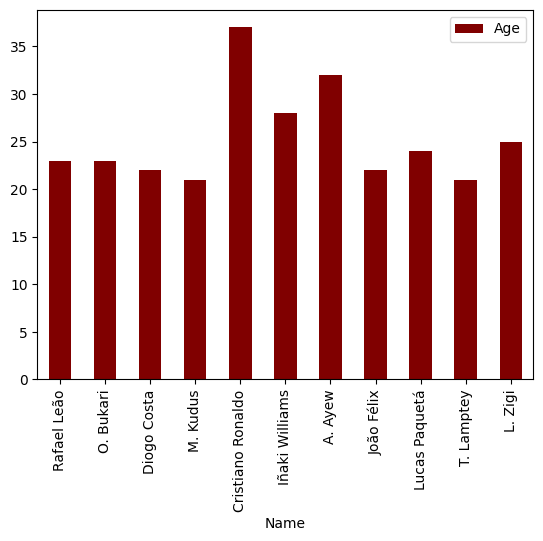

In [203]:
fifa_first_ten = fifa_final.copy()
fifa_first_ten=fifa_first_ten.drop(df.index[11:])
fifa_first_ten.plot(x="Name", y="Age", kind="bar", color='maroon')

### 6)Plot a graph - First 10 player's Name Vs Player's Wage

In [204]:
fifa_first_ten = fifa_final.copy()

In [79]:
df = fifa_first_ten['Wage'].str.replace(r'\D+', '', regex=True)

In [205]:
fifa_first_ten['Temp Wage'] = df

In [206]:
fifa_first_ten['Temp Wage'] = fifa_first_ten['Temp Wage'].astype(str).astype(int)

In [207]:
fifa_first_ten.sort_values(by='Temp Wage', ascending = False, inplace= True)

In [208]:
fifa_first_ten.reset_index(inplace=True)

In [209]:
fifa_first_ten.drop(['index','Image_link','Age','POT','OVA','Team','Duration','Value','Total_stats'], axis=1, inplace=True)

In [210]:
fifa_first_ten

,Name,Wage,Temp Wage
0,M. Solomon,900,900
1,L. Krejčí,900,900
2,S. Rochet,850,850
3,J. Šutalo,850,850
4,J. Braaf,750,750
...,...,...,...
584,H. Martín,0,0
585,A. Ayew,0,0
586,G. Ochoa,0,0
587,D. Lovren,0,0


In [211]:
fifa_first_ten.rename(columns = {'Temp Wage':'Wage'}, inplace = True)

In [212]:
fifa_first_ten=fifa_first_ten.drop(df.index[11:])

<AxesSubplot: xlabel='Name'>

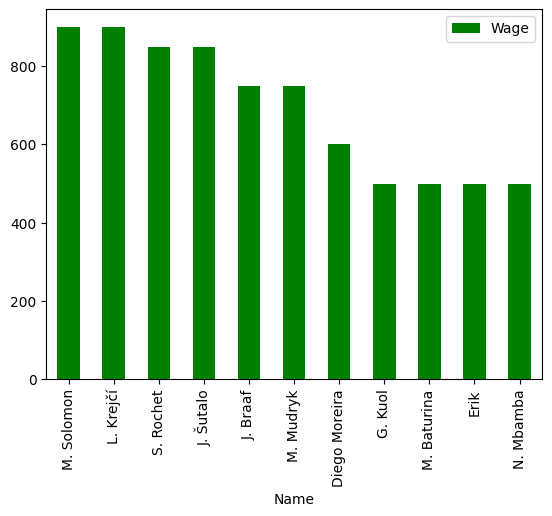

In [230]:
fifa_first_ten.plot(x="Name", y="Wage", kind="bar", color='green')

### 7)Find the Player(s) whose potential is more than 90

In [214]:
fifa_highpotential = fifa_final.copy()

In [215]:
fifa_highpotential.loc[fifa_highpotential['POT'] > 90, 'HigherPOT'] = 'True'

In [216]:
fifa_highpotential = fifa_highpotential.dropna()

In [217]:
fifa_highpotential.reset_index(inplace=True)

In [218]:
fifa_highpotential.drop(['index', 'Image_link','HigherPOT','Age','OVA','Team','Wage','Duration','Value','Total_stats'], axis=1, inplace=True)

In [219]:
fifa_highpotential

,Name,POT
0,D. Vlahović,91
1,Vinícius Jr.,92
2,L. Messi,91
3,J. Bellingham,91
4,E. Haaland,94
5,Pedri,92
6,Rúben Dias,91
7,J. Musiala,91
8,K. De Bruyne,91
9,Ederson,91


## 8)Sort players according to their Total Stats

In [220]:
fifa_total_stats = fifa_final.copy()

In [221]:
fifa_final

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/241/721/23_120.png,Rafael Leão,23,84,90,Milan,2019 ~ 2024,66.5M,90K,1971
1,https://cdn.sofifa.net/players/258/608/23_120.png,O. Bukari,23,70,74,,Free,0,0,1774
2,https://cdn.sofifa.net/players/234/577/23_120.png,Diogo Costa,22,80,86,Porto,2016 ~ 2026,27.5M,11K,1193
3,https://cdn.sofifa.net/players/245/155/23_120.png,M. Kudus,21,77,85,Ajax,2020 ~ 2025,23.5M,13K,2032
4,https://cdn.sofifa.net/players/020/801/23_120.png,Cristiano Ronaldo,37,90,90,Manchester United,2021 ~ 2023,41M,220K,2147
...,...,...,...,...,...,...,...,...,...,...
584,https://cdn.sofifa.net/players/264/699/23_120.png,K. Asllani,20,73,85,Inter,"Jun 30, 2023",7M,7K,1888
585,https://cdn.sofifa.net/players/266/609/23_120.png,T. Iroegbunam,19,63,82,Queens Park Rangers,"Jun 30, 2023",1.2M,7K,1681
586,https://cdn.sofifa.net/players/268/460/23_120.png,G. Kuol,17,60,82,Central Coast Mariners,2022 ~ 2024,775K,500,1466
587,https://cdn.sofifa.net/players/269/641/23_120.png,Iker Álvarez,20,62,74,Villarreal,2021 ~ 2023,850K,2K,1035


In [222]:
fifa_total_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Image_link   589 non-null    object
 1   Name         589 non-null    object
 2   Age          589 non-null    int64 
 3   OVA          589 non-null    int64 
 4   POT          589 non-null    int64 
 5   Team         589 non-null    object
 6   Duration     589 non-null    object
 7   Value        589 non-null    object
 8   Wage         589 non-null    object
 9   Total_stats  589 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 46.1+ KB


In [223]:
fifa_total_stats.sort_values(by='Total_stats', ascending=False, inplace=True)

In [224]:
fifa_total_stats

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
198,https://cdn.sofifa.net/players/209/658/23_120.png,L. Goretzka,27,87,88,FC Bayern München,2018 ~ 2026,91M,115K,2312
23,https://cdn.sofifa.net/players/212/198/23_120.png,Bruno Fernandes,27,86,86,Manchester United,2020 ~ 2026,72.5M,190K,2305
301,https://cdn.sofifa.net/players/224/334/23_120.png,M. Acuña,30,85,85,Sevilla,2020 ~ 2024,46.5M,46K,2303
121,https://cdn.sofifa.net/players/192/985/23_120.png,K. De Bruyne,31,91,91,Manchester City,2015 ~ 2025,107.5M,350K,2299
253,https://cdn.sofifa.net/players/212/622/23_120.png,J. Kimmich,27,89,90,FC Bayern München,2015 ~ 2025,105.5M,130K,2283
...,...,...,...,...,...,...,...,...,...,...
231,https://cdn.sofifa.net/players/243/585/23_120.png,G. Bazunu,20,70,84,Southampton,2022 ~ 2027,3.4M,13K,1141
410,https://cdn.sofifa.net/players/261/417/23_120.png,K. Mier,22,72,84,Atlético Nacional,2019 ~ 2025,5M,3K,1096
525,https://cdn.sofifa.net/players/262/621/23_120.png,G. Mamardashvili,21,78,84,Valencia,2022 ~ 2027,18.5M,17K,1082
501,https://cdn.sofifa.net/players/241/727/23_120.png,P. Rajković,26,78,81,Mallorca,2022 ~ 2026,14M,21K,1060


In [225]:
fifa_total_stats.drop(['Image_link', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value', 'Wage'], axis=1, inplace=True)

In [226]:
fifa_total_stats.reset_index(inplace=True)

In [227]:
fifa_total_stats

,index,Name,Total_stats
0,198,L. Goretzka,2312
1,23,Bruno Fernandes,2305
2,301,M. Acuña,2303
3,121,K. De Bruyne,2299
4,253,J. Kimmich,2283
...,...,...,...
584,231,G. Bazunu,1141
585,410,K. Mier,1096
586,525,G. Mamardashvili,1082
587,501,P. Rajković,1060


In [228]:
fifa_total_stats.drop(['index'], axis=1, inplace=True)

In [229]:
fifa_total_stats.head(50)

,Name,Total_stats
0,L. Goretzka,2312
1,Bruno Fernandes,2305
2,M. Acuña,2303
3,K. De Bruyne,2299
4,J. Kimmich,2283
5,D. Alaba,2277
6,E. Can,2274
7,João Cancelo,2262
8,L. Modrić,2257
9,S. Milinković-Savić,2250
